In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the Dependencies

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [13]:
# loading teh diabetes to a pandas Dataframe
diabetes_dataset = pd.read_csv("diabetes.csv")

In [14]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
nama_kolom = {
    'Pregnancies': 'Kehamilan',
    'Glucose': 'Glukosa',
    'BloodPressure': 'Tekanan Darah',
    'SkinThickness': 'Ketebalan Kulit',
    'Insulin': 'Insulin',
    'BMI': 'BMI',
    'DiabetesPedigreeFunction': 'Indikator RiwayatDiabet dalam Keluarga',
    'Age': 'Usia',
    'Outcome': 'Hasil'
}

# Mengubah nama kolom
diabetes_dataset = diabetes_dataset.rename(columns=nama_kolom)

In [16]:
diabetes_dataset.head()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,Indikator RiwayatDiabet dalam Keluarga,Usia,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
#jumlah row dan kolom dalam dataset
diabetes_dataset.shape

(768, 9)

In [18]:
# statistical data
diabetes_dataset.describe()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,Indikator RiwayatDiabet dalam Keluarga,Usia,Hasil
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
diabetes_dataset['Hasil'].value_counts()

0    500
1    268
Name: Hasil, dtype: int64

0 = Tidak Diabetes


---

1 = Diabetes

In [21]:
diabetes_dataset.groupby('Hasil').mean()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,Indikator RiwayatDiabet dalam Keluarga,Usia
Hasil,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [24]:
#labeling data dan label

X = diabetes_dataset.drop(columns = 'Hasil', axis=1)
Y = diabetes_dataset['Hasil']

In [25]:
print(X)

     Kehamilan  Glukosa  Tekanan Darah  Ketebalan Kulit  Insulin   BMI  \
0            6      148             72               35        0  33.6   
1            1       85             66               29        0  26.6   
2            8      183             64                0        0  23.3   
3            1       89             66               23       94  28.1   
4            0      137             40               35      168  43.1   
..         ...      ...            ...              ...      ...   ...   
763         10      101             76               48      180  32.9   
764          2      122             70               27        0  36.8   
765          5      121             72               23      112  26.2   
766          1      126             60                0        0  30.1   
767          1       93             70               31        0  30.4   

     Indikator RiwayatDiabet dalam Keluarga  Usia  
0                                     0.627    50  
1      

In [26]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Hasil, Length: 768, dtype: int64

Data Standarisasi

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X)

StandardScaler()

In [31]:
standarized_data = scaler.transform(X)

In [32]:
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [33]:
X = standarized_data
Y = diabetes_dataset['Hasil']

In [34]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Hasil, Length: 768, dtype: int64


Train Test Split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [39]:
classifier = svm.SVC(kernel='linear')

In [41]:
#training dengan SVM

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [42]:
#skor akurasi dari training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print('Akurasi skor dari Training data :', training_data_accuracy)

Akurasi skor dari Training data : 0.7866449511400652


In [45]:
#skor akurasi dari data test
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Akurasi skor dari Training data :', test_data_accuracy)

Akurasi skor dari Training data : 0.7727272727272727


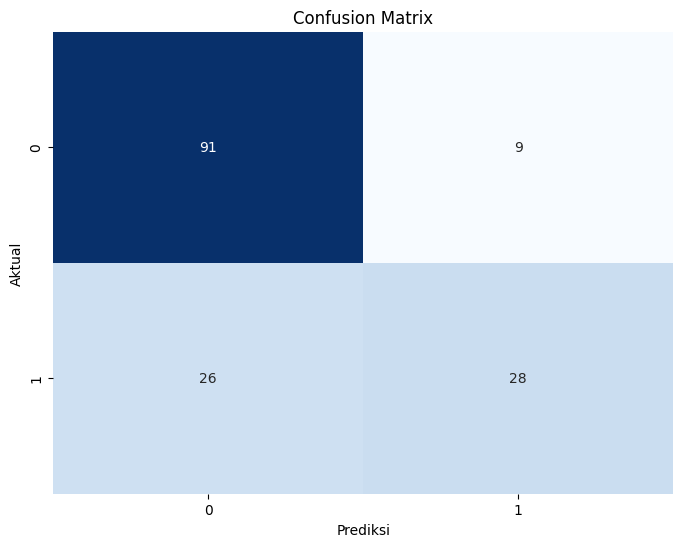

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


Buat Sistem Prediksi

In [49]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# ganti input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Orang tersebut tidak menderita diabetes')
else:
  print('Orang tersebut menderita diabetes')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
Orang tersebut menderita diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
import sklearn.externals
import joblib

# Menyimpan model ke file
joblib.dump(classifier, 'svm_model.pkl')

['svm_model.pkl']